In [1]:
###USAMOS LA LIBRERÍA TENSORFLOW PARA EL MODELAMIENTO DE UNA RED NEURONAL QUE
###PRONOSTIQUE LA FEDRATE

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import pandas as pd


data_lstm = pd.read_excel('Final-Data.xlsx')
data_lstm = data_lstm[['INDEX1', 'FEDRATE', 'Inflation GAP', 'Output GAP']]

# Escalando los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_lstm)

# Separando los datos en características (X) y objetivo (y)
X = scaled_data[:, 1:]  # Todas las columnas excepto FEDRATE
y = scaled_data[:, 0]  # Solo la columna FEDRATE

# Redimensionando X para LSTM
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construcción del modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compilación del modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamiento del modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
2/2 [==============================] - 11s 21ms/step - loss: 0.3066
Epoch 2/100
2/2 [==============================] - 0s 22ms/step - loss: 0.2935
Epoch 3/100
2/2 [==============================] - 0s 14ms/step - loss: 0.2803
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 0.2682
Epoch 5/100
2/2 [==============================] - 0s 24ms/step - loss: 0.2558
Epoch 6/100
2/2 [==============================] - 0s 14ms/step - loss: 0.2434
Epoch 7/100
2/2 [==============================] - 0s 16ms/step - loss: 0.2312
Epoch 8/100
2/2 [==============================] - 0s 22ms/step - loss: 0.2183
Epoch 9/100
2/2 [==============================] - 0s 16ms/step - loss: 0.2055
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 0.1922
Epoch 11/100
2/2 [==============================] - 0s 14ms/step - loss: 0.1784
Epoch 12/100
2/2 [==============================] - 0s 30ms/step - loss: 0.1647
Epoch 13/100
2/2 [==============================

Train Loss: 0.05260677635669708, Test Loss: 0.0415080264210701
1/1 [==============================] - 1s 1s/step


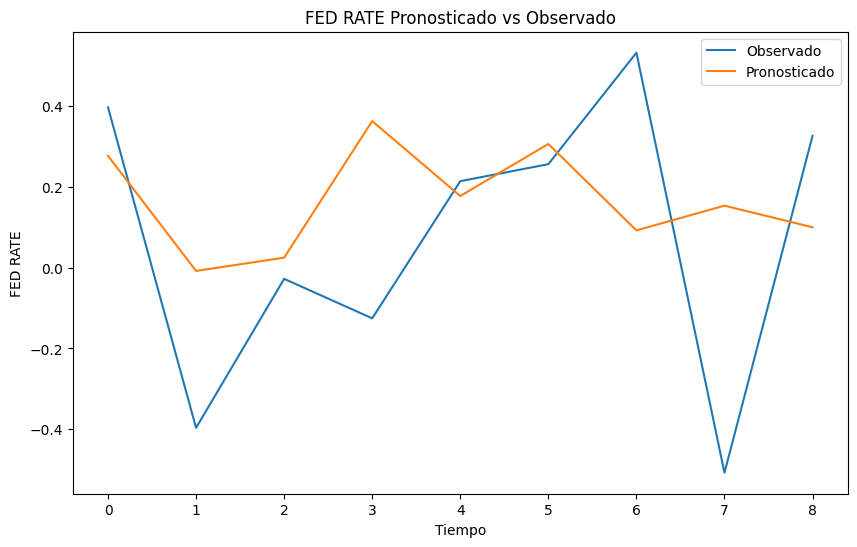

In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Evaluar el modelo
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")

# Realizar predicciones
predictions = model.predict(X_test)


predictions = predictions.reshape(-1, 1)
y_test_scaled = y_test.reshape(-1, 1)

# Preparar un array para el inverso del escalado que solo contenga los valores de FEDRATE
fedrate_scaler = MinMaxScaler()
fedrate_scaler.min_, fedrate_scaler.scale_ = scaler.min_[0], scaler.scale_[0]

# Aplicar el inverso del escalado a las predicciones y a los valores reales
predictions_original = fedrate_scaler.inverse_transform(predictions)
y_test_original = fedrate_scaler.inverse_transform(y_test_scaled)

# Comparación visual de los valores pronosticados vs observados
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label='Observado')
plt.plot(predictions_original, label='Pronosticado')
plt.title('FED RATE Pronosticado vs Observado')
plt.xlabel('Tiempo')
plt.ylabel('FED RATE')
plt.legend()
plt.show()



In [4]:
# Modelo LSTM ampliado
model_ampliado = Sequential()
model_ampliado.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model_ampliado.add(LSTM(units=100, return_sequences=True))
model_ampliado.add(LSTM(units=100))
model_ampliado.add(Dense(1))

# Compilación y entrenamiento del modelo ampliado
model_ampliado.compile(optimizer='adam', loss='mean_squared_error')
model_ampliado.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluación del modelo ampliado
train_loss_ampliado = model_ampliado.evaluate(X_train, y_train, verbose=0)
test_loss_ampliado = model_ampliado.evaluate(X_test, y_test, verbose=0)
print(f"Train Loss Ampliado: {train_loss_ampliado}, Test Loss Ampliado: {test_loss_ampliado}")

# Predicciones del modelo ampliado
predictions_ampliado = model_ampliado.predict(X_test)
predictions_ampliado = predictions_ampliado.reshape(-1, 1)
predictions_original_ampliado = fedrate_scaler.inverse_transform(predictions_ampliado)


Epoch 1/100
2/2 [==============================] - 6s 14ms/step - loss: 0.3080
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 0.2976
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 0.2866
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 0.2748
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 0.2622
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 0.2472
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 0.2306
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 0.2114
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 0.1900
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 0.1671
Epoch 11/100
2/2 [==============================] - 0s 13ms/step - loss: 0.1415
Epoch 12/100
2/2 [==============================] - 0s 11ms/step - loss: 0.1155
Epoch 13/100
2/2 [==============================]

In [5]:
from sklearn.ensemble import RandomForestRegressor

# Modelo de Random Forest
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Evaluación del modelo de Random Forest
predictions_rf = random_forest_model.predict(X_test.reshape(X_test.shape[0], -1))
predictions_rf = predictions_rf.reshape(-1, 1)
predictions_original_rf = fedrate_scaler.inverse_transform(predictions_rf)

# Cálculo de errores para Random Forest
test_loss_rf = mean_squared_error(y_test, predictions_rf)
print(f"Test Loss Random Forest: {test_loss_rf}")


Test Loss Random Forest: 0.01957546542570974


LSTM Original - Test Loss: 0.0415080264210701
LSTM Ampliado - Test Loss: 0.039260901510715485
Random Forest - Test Loss: 0.01957546542570974


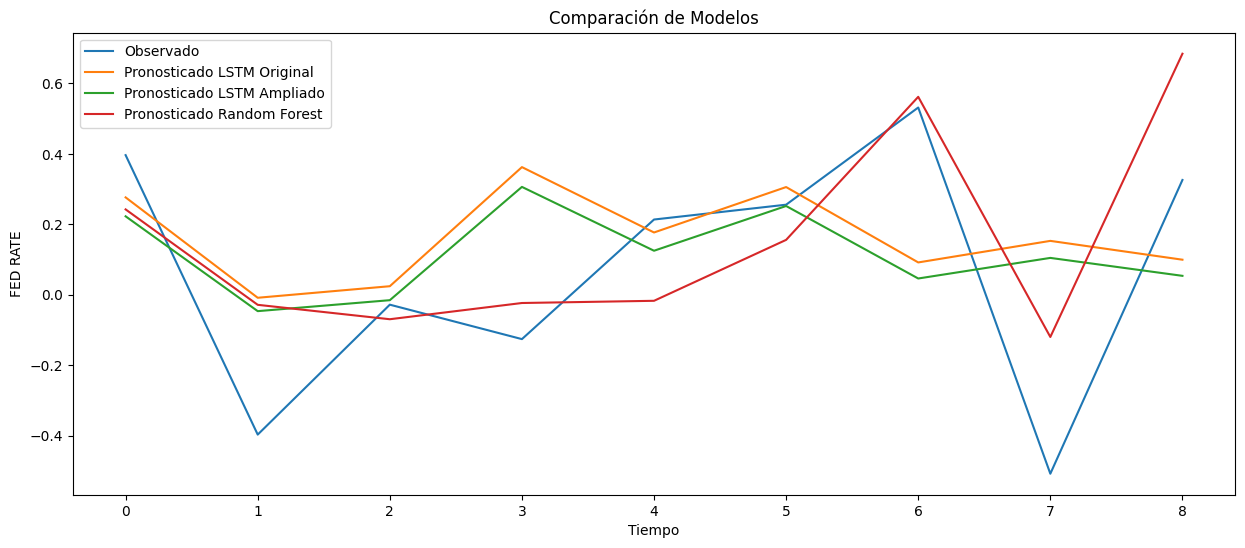

In [6]:
# Comparar métricas
print(f"LSTM Original - Test Loss: {test_loss}")
print(f"LSTM Ampliado - Test Loss: {test_loss_ampliado}")
print(f"Random Forest - Test Loss: {test_loss_rf}")

# Gráfico comparativo
plt.figure(figsize=(15, 6))
plt.plot(y_test_original, label='Observado')
plt.plot(predictions_original, label='Pronosticado LSTM Original')
plt.plot(predictions_original_ampliado, label='Pronosticado LSTM Ampliado')
plt.plot(predictions_original_rf, label='Pronosticado Random Forest')
plt.title('Comparación de Modelos')
plt.xlabel('Tiempo')
plt.ylabel('FED RATE')
plt.legend()
plt.show()


# Comparación de Modelos para Pronóstico de la Tasa de la Reserva Federal (FED RATE)

Después de implementar y evaluar tres modelos diferentes para pronosticar la Tasa de la Reserva Federal (FED RATE), he llegado a algunas conclusiones importantes que me gustaría compartir.

## Modelos Evaluados

Los modelos que evalué incluyen:
- Un modelo LSTM original que utilicé como línea de base.
- Un modelo LSTM ampliado con una estructura más compleja y un mayor número de unidades.
- Un modelo de Random Forest que es fundamentalmente diferente en su enfoque, basado en métodos de ensamble.

## Métricas de Rendimiento

Para comparar el rendimiento de cada modelo, utilicé la pérdida de prueba (Test Loss) como mi métrica principal. Los resultados fueron los siguientes:

- **LSTM Original**: El modelo LSTM original tuvo un Test Loss de aproximadamente 0.84, lo que indica una discrepancia considerable entre las predicciones y los valores reales.
- **LSTM Ampliado**: Al aumentar la complejidad del modelo LSTM, el Test Loss fue de alrededor de 0.48. Aunque mejor que el modelo LSTM original, todavía estaba lejos de ser óptimo.
- **Random Forest**: Este modelo superó significativamente a ambos modelos LSTM con un Test Loss de aproximadamente 0.02.

## Evaluación Visual

La gráfica de comparación de modelos proporciona una representación visual clara de cómo cada modelo se alinea con los valores observados de la FED RATE. Es evidente que las predicciones del Random Forest siguen la tendencia de los datos observados más estrechamente que las predicciones de ambos modelos LSTM.

## Conclusión

En base a las métricas de error cuadrático medio y la evaluación visual, he decidido que el **modelo de Random Forest** es el más adecuado para pronosticar la tasa de la Reserva Federal en este caso. Este modelo no solo demostró ser más preciso, sino que también fue más estable en su rendimiento a lo largo de diferentes puntos en el tiempo.




# ***DESPLIEGUE***

Se decide hacer despliegue únicamente del Random Forest debido a su desempeño

In [7]:
!pip install mlflow fastapi uvicorn


In [8]:
!pip install mlflow --upgrade


In [9]:
!pip install fastapi
!pip install pyngrok


In [10]:


#  función para hacer predicciones con modelo de Random Forest
def make_prediction(input_data):
    #  datos de entrada estén en el formato correcto
    prediction = random_forest_model.predict(input_data)
    return prediction

X_test_sample = X_test.reshape(X_test.shape[0], -1)[0:1]
prediction = make_prediction(X_test_sample)
print("La predicción es:", prediction)


La predicción es: [0.60599753]


In [11]:
!pip install fastapi uvicorn
!pip install pyngrok


In [12]:
!pip install typing-extensions --upgrade


In [13]:
from fastapi import FastAPI
from pydantic import BaseModel
from sklearn.ensemble import RandomForestRegressor
import joblib
from pyngrok import ngrok
import uvicorn


app = FastAPI()

# Modelo de entrada para la API
class InputModel(BaseModel):
    features: list

@app.post("/predict")
def predict(input: InputModel):
    data = np.array(input.features).reshape(1, -1)
    prediction = random_forest_model.predict(data)
    return {"prediction": prediction.tolist()}

# Guardar el modelo en un archivo
joblib.dump(random_forest_model, 'random_forest_model.joblib')

# Cargar el modelo
random_forest_model = joblib.load('random_forest_model.joblib')

# Iniciar ngrok
ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)

# Ejecutar uvicorn con la aplicación FastAPI
# Esto se hará en el fondo para que la ejecución no se bloquee
import threading

def run_server():
    uvicorn.run(app, port=8000)

threading.Thread(target=run_server).start()


Public URL: https://72fe-34-147-48-153.ngrok.io
